# **BAB 1 Introduction**

## 1.1. Identitas
Nama : Ma'ruf Habibie Siregar  
**Program ini dibuat untuk membantu tenaga medis mendeteksi diabetes dini** agar bisa dilakukan penanganan lebih awal dan mencegah resiko yang lebih serius.

Link deployment : [DiabetesED](https://earlydiabetesdetect.streamlit.app/)



## 1.2. Background and Problem Statement  
### 1.2.1. Latar Belakang
**Konsumsi gula berlebihan** menjadi **masalah kesehatan serius** yang sering terabaikan. Hal ini bisa dijumpai di berbagai usia karena mudahnya akses ke **makanan dan minuman manis** di berbagai tempat seperti **supermarket, minimarket, warung-warung, dan gerobak jajanan dipinggir jalan**. Kondisi ini sangat mengkhawatirkan karena konsumsi gula secara terus-menerus dapat meningkatkan **risiko diabetes**.

**Diabetes** merupakan salah satu **penyebab kematian tertinggi di dunia**. **Deteksi dini diabetes sangat penting** agar risiko komplikasi dapat diminimalisir. Dengan adanya **deteksi dini** pada masyarakat, tenaga medis, orang tua, dan keluarga dapat melakukan pencegahan risiko yang lebih parah di masa depan. Oleh karena itu, diperlukan **metode deteksi dini diabetes** untuk membantu orangtua, keluarga, dan tenaga medis dalam pencegahan risiko yang lebih serius serta penanganan lebih awal.

### 1.2.2. Problem Statement
Melakukan pembuatan **machine learning** untuk **mendeteksi gejala dini diabetes pada masyarakat**, sehingga dapat membantu tenaga medis, orang tua, dan keluarga melakukan pencegahan **resiko komplikasi yang lebih parah di masa depan**.


# **BAB 2 Import Libraries**
Disini saya akan mencantumkan library-library yang akan saya pakai. Library-library itu akan saya masukkan secara bertahap.

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle

# **BAB 3 Data Loading**

Disini saya akan loading dataset yang saya perlukan dalam pembuatan machine learning

In [2]:
#Load data csv
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
#Cek 5 baris pertama
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
#Cek 5 baris terakhir
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


Keterangan nama-nama kolom

| Nama Kolom          | Keterangan                                                                                              |
|---------------------|--------------------------------------------------------------------------------------------------------|
| Age                 | Usia pasien                                                                                             |
| Gender              | Jenis kelamin pasien (Female = perempuan, Male = laki-laki)                                            |
| Polyuria            | Kondisi sering buang air kecil, gejala umum pada diabetes                                              |
| Polydipsia          | Rasa haus yang berlebihan                                                                               |
| Sudden weight loss   | Penurunan berat badan secara tiba-tiba                                                                 |
| Weakness            | Kondisi fisik yang melemah                                                                              |
| Polyphagia          | Rasa lapar atau nafsu makan yang berlebihan                                                            |
| Genital thrush      | Infeksi jamur pada area genital                                                                          |
| Visual blurring     | Penglihatan yang kabur                                                                                      |
| Itching             | Rasa gatal pada anggota badan                                                                                              |
| Irritability        | Mudah marah atau gelisah                                                                               |
| Delayed healing     | Luka yang lama sembuhnya                                                                                   |
| Partial paresis     | Kelemahan atau kelumpuhan sebagian otot                                                                |
| Muscle stiffness    | Kekakuan pada otot                                                                                      |
| Alopecia            | Kebotakan atau rambut yang rontok                                                                           |
| Obesity             | Kegemukan                                                                         |
| Class               | Hasil diagnosis diabetes (Positive = terdiagnosis diabetes, Negative = tidak diabetes)                |


In [5]:
#Cek shape dataset
print('Ukuran dataset :', df.shape)

Ukuran dataset : (520, 17)


Insight :  

Dari info diatas saya mendapatkan dataset mempunyai **520 baris dan 17 kolom**

In [6]:
#Cek distribusi target
jumlah_class = df['class'].value_counts() #Menghitung jumlah class positive dan negative
persen_jumlah_class = df['class'].value_counts(normalize=True)*100 #Jumlah positive dan negative di jadikan persen
result_jumlah_class = pd.DataFrame({'Jumlah Kelas': jumlah_class, 'Persentase(%)': persen_jumlah_class}) #Convert ke dataframe
result_jumlah_class

,Jumlah Kelas,Persentase(%)
class,,
Positive,320,61.538462
Negative,200,38.461538


In [ ]:
#Mengecek Imbalance Ratio
IR = 320/200
print(IR)

1.6


Insight :  

Dari hasil pengecekan distribusi diatas saya mengasumsikan bahwa data termasuk **mild imbalance** [reference](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)  karena **Imbalance Rationya sama dengan 1.6**


In [8]:
#Cek duplikat
total_baris_duplikat = df.duplicated().sum()
print(f"Jumlah total baris duplikat: {total_baris_duplikat}")

Jumlah total baris duplikat: 269


Insight :   

Dari hasil pengecekan **duplikat** diatas terdapat **269 data duplikat**. Data duplikat itu saya asumsikan sebagai **normal** berdasarkan keterangan-keterangan pada fitur/kolom, karena bisa jadi gejala pada satu pasien dengan pasien lain itu sama kalau dia terindikasi **positif atau negatif diabetes**. Maka dari itu saya akan membiarkan data duplikat itu karena terjadi secara **normal** dan karena tidak ada fitur **id** yang biasanya membedakan tiap individu.


In [9]:
#Cek Missing Value
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Insight :  
Dari info diatas saya dapatkan **tidak ada missing value** pada datasetnya

In [10]:
#Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Insight :  
1. **Ketidak konsistensi-an pada nama fitur**, dimana ada yang diawal huruf kapital dan ada yang tidak huruf kapital.  
2. Ada **spasi antara kata**  
3. **Tipe data sudah sesuai**  

Saya akan melakukan perubahan pada nama fitur dengan **merubahnya menjadi huruf kecil semua** dan **menambahkan "_" (underscore) antara kalimat**. Ini berguna untuk membuat nama kolom sejenis dan memudahkan dalam proses selanjutnya.


In [13]:
#Mengubah nama fitur dan target menjadi huruf kecil dan menambah '_' antar kata
df.columns = df.columns.str.lower().str.replace(' ', '_')

#cek info dataset apakah namanya sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

Insight :  
Nama fitur telah diubah 

# **BAB 4 Exploratory Data Analysis (EDA)**

Pada bab ini saya akan melakukan beberapa explorasi data. Dalam prosesnya saya akan menggunakan dataframe yang yang saya duplikasi dari dataframe asli supaya tidak mengganggu dataframe asli.

In [18]:
#Copy dataframe untuk EDA
df_eda = df.copy()

Pertanyaan untuk Explorasi Data

1. Berapa **rata-rata umur, nilai tengah, umur minimum, serta umur maksimum** pada pasien yang terdeteksi **positif diabetes**?
2. Apakah pasien yang **positif diabetes sering mengalami penyembuhan luka yang lambat**?
3. Bagaimana **hubungan antara berat badan yang berlebihan dengan positif terkena diabetes**?
4. **Gejala mana yang paling sering ditemui** saat seorang terindikasi positif diabetes?
5. Apakah ada **hubungan antara umur dengan delay_healing / pelambatan saat penyembuhan luka**?
6. Adakah orang yang **positif diabetes tapi tanpa gejala**?
7. Apakah orang yang positif diabetes biasanya mengalami gejala **sering buang air kecil (Polyuria)** dan **haus yang berlebihan (Polydipsia)**?

## 4.1. Rata-rata umur, nilai tengah, umur minimum dan umur maximum pada pasien yang positif diabetes

In [19]:
# Filter data pasien positif diabetes
df_positif = df_eda[df_eda['class'] == 'Positive']
df_positif.describe()

,age
count,320.000000
mean,49.071875
std,12.097481
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,90.000000


Text(0, 0.5, 'Umur')

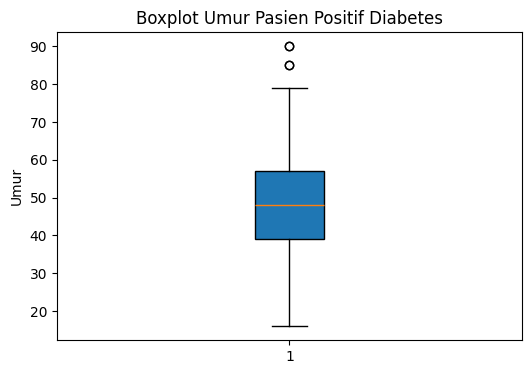

In [20]:
#Membuat botplot
plt.figure(figsize=(6,4))
plt.boxplot(df_positif['age'], patch_artist=True)
plt.title('Boxplot Umur Pasien Positif Diabetes')
plt.ylabel('Umur')

**Insight**  
1. **Rata-rata umur yang positif diabetes ada di 49** dan **mediannya di 48**  
2. **Umur minimum yang positif diabetes ada di angka 16 tahun**, berarti walaupun rata-rata di umur 48 tahun, **diabetes juga bisa muncul di usia muda**  
3. **Umur maksimum penderita diabetes adalah 90 tahun**, menunjukkan bahwa pasien lansia juga masih berisiko terkena diabetes tahap awal.  
   Hal ini mendukung **pentingnya skrining rutin untuk semua kelompok umur, termasuk lansia.**

Hal ini sesuai dengan literatur medis dimana disebutkan bahwa **resiko diabetes meningkat seiring bertambahnya usia, terutama jika di atas 40 tahun.**  
Namun dari data di atas terlihat fakta bahwa ada pasien dengan usia muda, yaitu 16 tahun.  
Itu menunjukkan bahwa ada **faktor resiko lain (seperti genetik dan pola makan) juga berperan dalam munculnya diabetes di usia muda.**

Referensi: [CDC - Diabetes Basics](https://www.cdc.gov/diabetes/about/?CDC_AAref_Val=https://www.cdc.gov/diabetes/basics/diabetes.html)

## 4.2. Pengaruh pasien yang positif diabetes dengan penyembuhan luka yang lambat

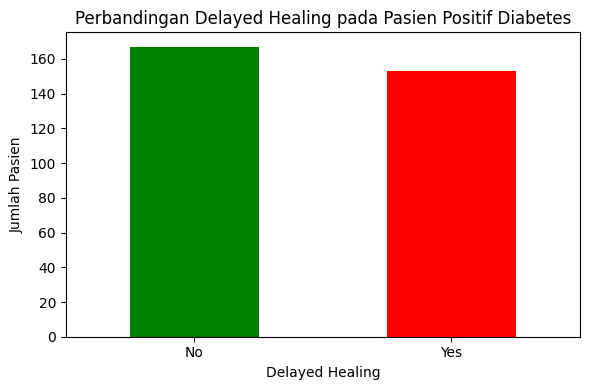

In [21]:
#Menghitung jumlah pasien positif yang penyembuhan lukanya lambat atau tidak lambat
delayed_healing_counts = df_positif['delayed_healing'].value_counts()

#Membuat diagram bar
plt.figure(figsize=(6,4))
delayed_healing_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Perbandingan Delayed Healing pada Pasien Positif Diabetes')
plt.xlabel('Delayed Healing')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight**:

Dari diagram di atas bisa diambil kesimpulan bahwa pada diabetes tahap awal, **Delayed Healing bukan satu-satunya faktor untuk melihat bahwa pasien positif diabetes.**  
Pada tahap awal, **kadar gula darah mungkin belum cukup tinggi untuk memengaruhi regenerasi jaringan secara signifikan.**  
Gejala ini biasanya lebih jelas pada fase diabetes lanjut karena **kerusakan kapiler darah dan sistem imun yang melemah.**

Referensi: [Halodoc - Ini Alasan Luka Lebih Susah Sembuh pada Pengidap Diabetes](https://www.halodoc.com/artikel/ini-alasan-luka-lebih-susah-sembuh-pada-pengidap-diabetes)

Saya akan coba cek korelasinya apakah benar delay healing mempengaruhi pasien positif diabetes tahap awal atau tidak.  
Disini saya menggunakan metode **Chi-square** karena kedua kolom sama-sama kolom kategorikal.


    Hipotesis :
    H0 = Tidak ada hubungan antara penyembuhan luka yang lambat dengan hasil diagnosa diabetes  
    H1 = Ada hubungan antara penyembuhan luka yang lambat dengan hasil diagnosa diabetes

In [22]:
#Cek korelasi antara delay healing dengan positif/negatif diabetes dengan chi-square
contingency_table1 = pd.crosstab(df_eda['delayed_healing'], df_eda['class'])

chi2, p, dof, expected = chi2_contingency(contingency_table1)
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 0.962
P-value: 0.327


**Insight**:  

Dari hasil uji korelasi di atas dimana **p-value > 0.05** meyakinkan lagi bahwa **tidak ada hubungannya delay healing dengan diagnosa positif atau negatif nya pasien terhadap diabetes tahap awal.**  
Maka dari itu secara otomatis **H1 Tertolak.**

## 4.3. Hubungan antara berat badan yang berlebihan dengan positif terkena diabetes

Karena fitur obesitas dan target class adalah kategorikal maka saya akan menggunakan metode chi-square dalam melihat hubungannya

    Hipotesis :
    H0 = Tidak ada hubungan antara obesitas dengan hasil diagnosa diabetes  
    H1 = Ada hubungan antara obesitas dengan hasil diagnosa diabetes

In [23]:
#Cek korelasi antara obesitas dengan positif/negatif diabetes dengan chi-square
contingency_table2 = pd.crosstab(df_eda['obesity'], df_eda['class'])

chi2, p, dof, expected = chi2_contingency(contingency_table2)
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 2.327
P-value: 0.127


Dari hasil korelasi diatas bisa disimpulkan bahwa **H1 gagal ditolak karena p-value > 0.05**. Artinya **tidak ada bukti cukup kalau obesitas berhubungan dengan status positif diabetes pasien**. Walaupun obesitas adalah faktor risiko diabetes tipe 2, tidak semua penderita diabetes tahap awal adalah obesitas. Hal ini dapat disebabkan oleh faktor keturunan, resistensi insulin, atau gaya hidup lain yang berisiko, bahkan pada individu dengan berat badan normal juga bisa terindikasi diabetes.  

Referensi : [aido.id - obesitas menjadi faktor pemicu diabetes](https://aido.id/health-articles/obesitas-menjadi-faktor-pemicu-penyakit-diabetes/detail)

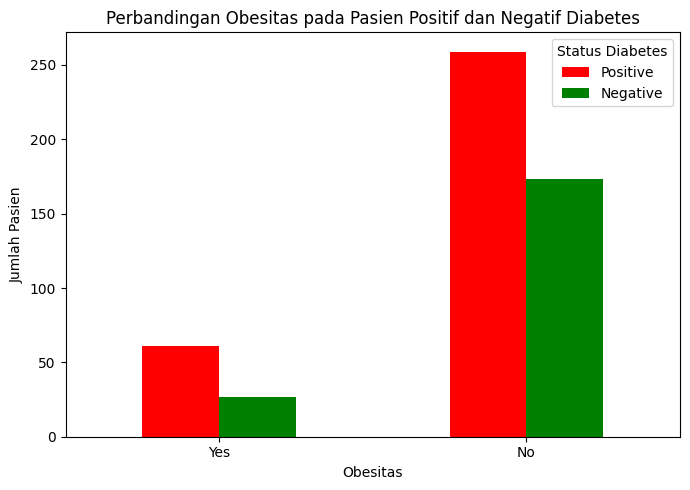

In [24]:
#Membuat diagram pasien yang positif dan negatif diabetes terhadap obesitas

df_negatif = df_eda[df_eda['class'] == 'Negative']

obesity_pos_counts = df_positif['obesity'].value_counts()
obesity_neg_counts = df_negatif['obesity'].value_counts()

# Gabungkan dalam satu DataFrame agar mudah untuk plotting
data_compare = pd.DataFrame({
    'Positive': obesity_pos_counts,
    'Negative': obesity_neg_counts
})

# Pastikan urutan indeks sama (biasanya 'Yes' dan 'No')
data_compare = data_compare.reindex(['Yes', 'No'])

# Membuat plot bar perbandingan positive diabetes dan negatif diabetes terhadap ya/tidak nya obesitas
ax = data_compare.plot(kind='bar', figsize=(7, 5), color=['red', 'green'])
plt.title('Perbandingan Obesitas pada Pasien Positif dan Negatif Diabetes')
plt.xlabel('Obesitas')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.legend(title='Status Diabetes')
plt.tight_layout()
plt.show()

**Insight** :  
Dari diagram diatas juga diatas juga memperkuat bahwa **tidak selalu orang yang obesitas terindikasi positif diabetes tahap awal.**

## 4.4. Hubungan umur dengan pelambatan penyembuhan luka?

In [25]:
#Melihat skew fitur umur
df_eda['age'].skew()

0.3293593578272701

**Insight** :  

Dari hasil diatas saya simpulkan **bahwa distribusi umur normal** karena skewnessnya kecil. Maka dari itu saya akan **melakukan metode Uji T-test statistic karena fitur delay healing adalah fitur kategorikal**

    Hipotesis :
    H0 = Tidak ada hubungannya umur dengan perlambatan penyembuhan luka
    H1 = Ada hubungannya umur dengan perlambatan penyembuhan luka

In [26]:
#Uji T-statistic

# Data umur berdasarkan kategori delayed_healing
age_delayed_yes = df_eda[df_eda['delayed_healing'] == 'Yes']['age']
age_delayed_no = df_eda[df_eda['delayed_healing'] == 'No']['age']

# Hitung t-statistic dan p-value menggunakan independent t-test
t_stat, p_val = stats.ttest_ind(age_delayed_yes, age_delayed_no)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: 6.065
P-value: 0.000


**Insight**:  
1. **t-statistic menunjukkan adanya hubungan antara umur dan delay healing,** dimana ada karakteristik umur untuk pasien yang mengalami delay healing.  
2. **p-value 0** yang menandakan hubungan ini **bukan kebetulan, berarti H0 tertolak.**  
3. Maka dari itu saya akan cek kekuatan hubungannya menggunakan metode **Cohen's d**.


In [27]:
# Hitung Cohen's d
mean1 = np.mean(age_delayed_yes)
mean2 = np.mean(age_delayed_no)
std1 = np.std(age_delayed_yes, ddof=1)
std2 = np.std(age_delayed_no, ddof=1)
n1 = len(age_delayed_yes)
n2 = len(age_delayed_no)

# Pooled Standard Deviasi
pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

cohen_d = (mean1 - mean2) / pooled_std

print (f"Cohen_d = {cohen_d}")

Cohen_d = 0.5336927063644619


**Insight** :      
Dari hasil cohen_d diatas terlihat **ada hubungan sedang antara umur dengan lambatnya penyembuhan luka**.

<Figure size 1000x600 with 0 Axes>

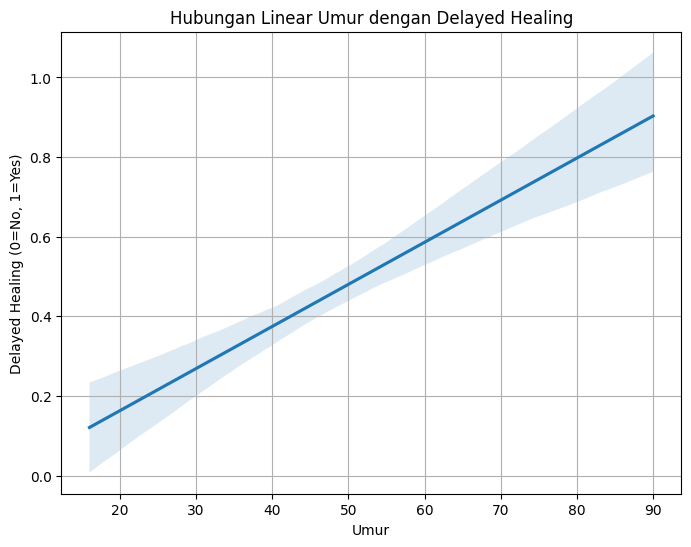

In [28]:
plt.figure(figsize=(10,6))

# Ubah delayed_healing menjadi numerik (Yes=1, No=0)
df_eda['delayed_healing_numeric'] = df_eda['delayed_healing'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(8,6))

#Membuat scatter plot
sns.regplot(
    x='age',
    y='delayed_healing_numeric',
    data=df_eda,
    scatter=False,  # agar titik tidak ditampilkan
)
#tampilkan plot hubungan umur dengan delay healing
plt.xlabel('Umur')
plt.ylabel('Delayed Healing (0=No, 1=Yes)')
plt.title('Hubungan Linear Umur dengan Delayed Healing')
plt.grid(True)
plt.show()


**Kesimpulan**:

Dari line plot di atas juga menguatkan ada **hubungan linear antara umur dan delay healing.** Semakin bertambahnya usia (sumbu x) semakin beresiko mengalami delay healing (sumbu y). Itu terlihat dari line yang terus meningkat perlahan sejalan dengan umur pasien yang bertambah. Maka wajar jika pasien lansia lebih rentan mengalami luka yang lambat sembuh, tidak hanya karena diabetes. Berdasarkan hasil dari **Cohen's d, kekuatan hubungannya sedang**, jadi ada faktor lain yang mempengaruhi delay healing selain umur. Maka dari itu bisa jadi kesimpulan juga **bukan hanya positif diabetes yang menyebabkan penyembuhan luka lambat, tapi umur juga berpengaruh.**

Referensi : [kumparanmom : masa otot menurun sejak usia 30 an](https://kumparan.com/kumparanmom/massa-otot-menyusut-sejak-usia-30-tahun-yuk-perhatikan-ini-moms-23F2kz3V66p)


## 4.5. Melihat Orang yang positif diabetes tapi tanpa gejala

C:\Users\maruf\AppData\Local\Temp\ipykernel_25624\1640950015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['total_gejala'] = df_positif.apply(count_yes, axis=1)


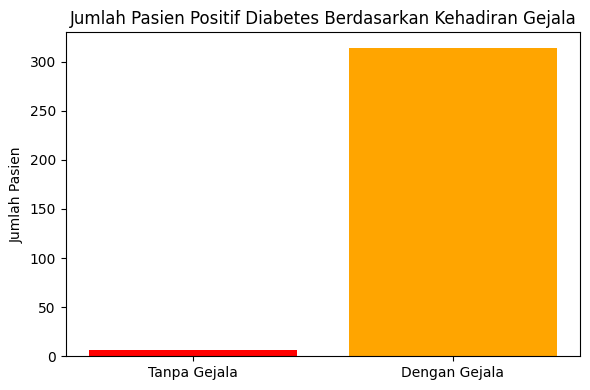

In [29]:
gejala_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush',
               'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
               'muscle_stiffness', 'alopecia', 'obesity']

# Fungsi untuk menghitung jumlah 'Yes' pada kolom gejala per baris menggunakan if-else
def count_yes(row):
    count = 0
    for col in gejala_cols:
        if row[col] == 'Yes':
            count += 1
    return count

# Hitung total gejala untuk setiap pasien positif diabetes
df_positif['total_gejala'] = df_positif.apply(count_yes, axis=1)

# Hitung jumlah pasien tanpa gejala (total_gejala == 0)
tanpa_gejala_count = df_positif[df_positif['total_gejala'] == 0].shape[0]

# Hitung jumlah pasien dengan gejala (total_gejala > 0)
dengan_gejala_count = df_positif[df_positif['total_gejala'] > 0].shape[0]

# Siapkan data untuk plotting
counts = [tanpa_gejala_count, dengan_gejala_count]
labels = ['Tanpa Gejala', 'Dengan Gejala']

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['red', 'orange'])
plt.title('Jumlah Pasien Positif Diabetes Berdasarkan Kehadiran Gejala')
plt.ylabel('Jumlah Pasien')
plt.tight_layout()
plt.show()

**Insight**:  

Dari diagram di atas bisa saya simpulkan ternyata ada juga pasien yang **positif diabetes tanpa gejala,** tapi jumlahnya sangat **sedikit sekali.** Ini menunjukkan adanya kasus **asymptomatic diabetes di tahap awal.** Hal ini sering terjadi, terutama pada pasien yang tidak sadar akan faktor risikonya, atau ketika gejala masih sangat ringan dan belum mengganggu aktivitas sehari-hari.

Referensi : [diabetes.org : diabetes sign and symptoms](https://www.diabetes.org.uk/about-diabetes/symptoms)

## 4.6. Jumlah orang yang positif diabetes mengalami gejala sering buang air kecil (Polyuria) dan haus yang berlebihan (Polydipsia)

In [30]:
#Menghitung total positif diabetes dan di urutkan berdasarkn polyuria dan polydipsia
total_positif = df_positif.shape[0]
polyuria_polydipsia_count = df_positif[(df_positif['polyuria'] == 'Yes') & (df_positif['polydipsia'] == 'Yes')].shape[0]
print(f"Jumlah Pasien positif diabetes dengan gejala Polyuria dan Polydipsia adalah {polyuria_polydipsia_count} dari {total_positif}")

Jumlah Pasien positif diabetes dengan gejala Polyuria dan Polydipsia adalah 193 dari 320


Text(0, 0.5, 'Jumlah Pasien')

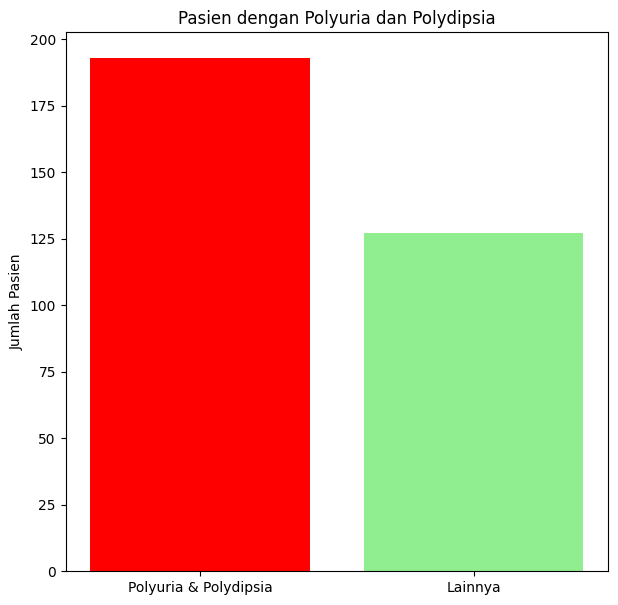

In [31]:
#Membuat plot bar
plt.figure(figsize=(7,7))
plt.bar(['Polyuria & Polydipsia', 'Lainnya'], [polyuria_polydipsia_count, df_positif.shape[0]-polyuria_polydipsia_count], color=['red','lightgreen'])
plt.title('Pasien dengan Polyuria dan Polydipsia')
plt.ylabel('Jumlah Pasien')

**Insight** :   

Dari bar diagram di atas saya ambil **insight** bahwa ternyata **polyuria dan polydipsia menjadi salah dua gejala yang menandakan pasien positif diabetes.**  
Polyuria (sering buang air kecil) dan polydipsia (haus berlebihan) terjadi karena tubuh mencoba mengeluarkan kelebihan glukosa melalui urin, yang menarik cairan dari jaringan.  
Ini adalah **gejala fisiologis paling awal dan khas pada diabetes,** maka tidak mengherankan jika grafik menunjukkan dominasi keduanya.

Referensi : [clevelandclinic : ketika orang punya sedikit insulin](https://my.clevelandclinic.org/health/diseases/21945-diabetic-ketoacidosis-dka?utm_source=chatgpt.com)

## 4.7. Gejala yang paling sering ditemui saat seorang terindikasi positif diabetes

In [32]:
#Melihat gejala yang sering ditemui pada penderita diabetes
gejala_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush',
               'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
               'muscle_stiffness', 'alopecia', 'obesity']
#Mengurutkan frekuensi gejala yang positif diabetes, dari gejala paling banyak 
frekuensi_gejala = df_positif[gejala_cols].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False)

frekuensi_gejala

polyuria              243
polydipsia            225
weakness              218
partial_paresis       192
polyphagia            189
sudden_weight_loss    188
visual_blurring       175
itching               154
delayed_healing       153
muscle_stiffness      135
irritability          110
genital_thrush         83
alopecia               78
obesity                61
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'polyuria'),
  Text(1, 0, 'polydipsia'),
  Text(2, 0, 'weakness'),
  Text(3, 0, 'partial_paresis'),
  Text(4, 0, 'polyphagia'),
  Text(5, 0, 'sudden_weight_loss'),
  Text(6, 0, 'visual_blurring'),
  Text(7, 0, 'itching'),
  Text(8, 0, 'delayed_healing'),
  Text(9, 0, 'muscle_stiffness'),
  Text(10, 0, 'irritability'),
  Text(11, 0, 'genital_thrush'),
  Text(12, 0, 'alopecia'),
  Text(13, 0, 'obesity')])

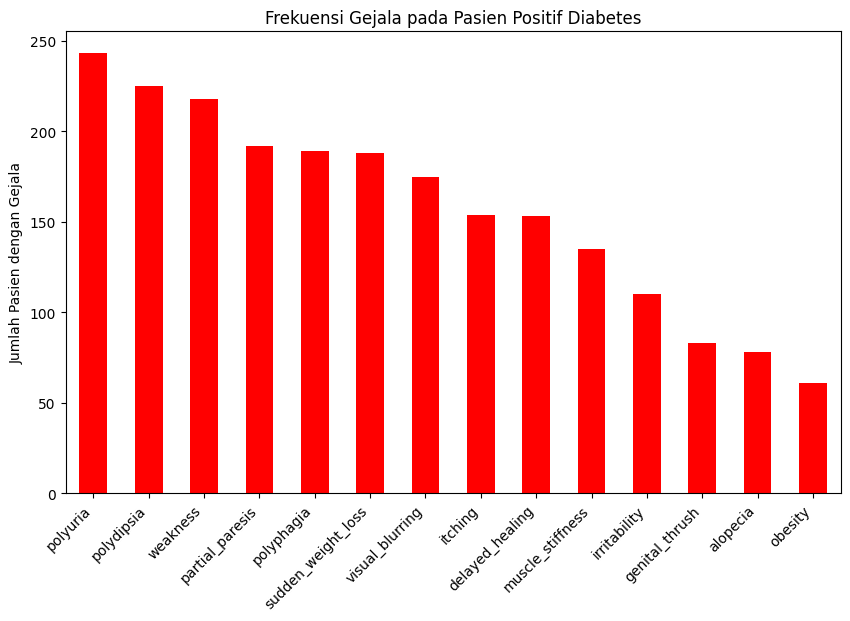

In [33]:
#Membuat plot frekuensi gejala
plt.figure(figsize=(10,6))
frekuensi_gejala.plot(kind='bar', color='red')
plt.title('Frekuensi Gejala pada Pasien Positif Diabetes')
plt.ylabel('Jumlah Pasien dengan Gejala')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

**Insight** :   

Dari hasil di atas saya simpulkan ada **5 gejala yang paling tinggi atau sering muncul pada pasien positif diabetes, yaitu**:  

1. **polyuria** (kondisi sering buang air kecil) = 243 pasien  
2. **polydipsia** (rasa haus yang berlebihan) = 225 pasien  
3. **weakness** (kondisi fisik yang melemah) = 218 pasien  
4. **partial paresis** (melemah atau lumpuhnya otot) = 192 pasien  
5. **polypaghia** (rasa lapar atau nafsu makan yang berlebihan) = 189 pasien  

Gejala-gejala tersebut adalah hasil dari tubuh yang **tidak dapat menggunakan glukosa dengan efektif**, sehingga energi menurun, otot lemas (paresis), dan tubuh merespons dengan makan/minum lebih banyak.  
Ini adalah rantai gejala biologis yang muncul sejak awal diabetes.  

Referensi : [health.grid.id : tanda awal terkena diabetes yang sering diabaikan](https://health.grid.id/read/353596036/inilah-polifagia-tanda-awal-diabetes-tipe-2-yang-sering-terabaikan?page=all)


# **BAB 5 Feature Enginerring**

Pada tahap ini saya akan melakukan beberapa transformasi data agar menjadi fitur-fitur yang memudahkan model dalam belajar dan membuat prediksi.

## 5.1. Check cardinality

Pada tahap ini saya akan mengecek cardinality pada kolom kategorikal. Disini saya akan hanya mengambil yang low cardinality dengan alasan :  

1. Memudahkan proses machine learning dalam mengolah data dengan mengurangi kompleksitas dari fiturnya
2. Mencegah risiko overfitting, di mana kolom dengan high cardinality dapat menyebabkan model "menghafal" data daripada belajar pola datanya.  

Referensi : https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [34]:
#Check Cardinality

pd.set_option('display.max_colwidth', None) #max_colwitdth akan memaksimalkan kolom jadi ngk kepotong

cat_cols_df = list(df.select_dtypes(include='object').columns) #list semua kolom yang tipe datanya object

listItem = [] #Membuat list kosong
for col in cat_cols_df:
  '''method untuk cek unique value pada kolom kategorikal di X_train'''
  listItem.append([col, df[col].nunique(), df[col].unique()]) #Memasukkan value yang unik ke list kosong disini

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem) #Convert hasil yang dalam bentuk list ke dataframe

,nama kolom,jumlah nilai unique,nilai unique
0,gender,2,"[Male, Female]"
1,polyuria,2,"[No, Yes]"
2,polydipsia,2,"[Yes, No]"
3,sudden_weight_loss,2,"[No, Yes]"
4,weakness,2,"[Yes, No]"
5,polyphagia,2,"[No, Yes]"
6,genital_thrush,2,"[No, Yes]"
7,visual_blurring,2,"[No, Yes]"
8,itching,2,"[Yes, No]"
9,irritability,2,"[No, Yes]"


**Insight** :  

Dari hasil check cardinality di atas saya dapatkan **semua kolom kategorikalnya adalah low cardinality**, jadi tidak ada fitur yang perlu saya hapus.

## 5.2. Split Dataset

Pada tahap ini saya akan split dataset antara fitur dan target

In [35]:
# Splitting dataset antara menjadi Fitur dan Target
X = df.drop(['class'], axis=1) # fitur
y = df['class'] # target

In [36]:
#Cek fitur dan target
X.head() #cek fitur

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [37]:
y.head() #cek target

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: class, dtype: object

**Insight**  :  

Dataset telah **ter-split menjadi Fitur dan Target**. Setelah itu saya akan **split Dataset menjadi Dataset Train dan Dataset Test** dengan **perbandingan 80-20**. Ini berguna supaya **tidak ada data leakage** atau model **benar-benar diuji pada data asli** yaitu pada data test.  

Referensi : https://www.techtarget.com/searchenterpriseai/definition/data-splitting

In [38]:
#Split data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (416, 16)
Test Size (104, 16)


**Insight** :  

Dari info diatas dataset telah di split dimana :

1. Dataset Train berjumlah **416 baris dan 16 kolom**
2. Dataset Test berjumlah **104 baris dan 16 kolom**

## 5.3. Handle Missing Values

Missing value sebenarnya telah di check di BAB 3 (Data Loading), akan tetapi saya akan mengecek ulang apakah betul-betul tidak ada missing value.

In [39]:
#Cek missing value pada X_train
X_train.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [40]:
#Cek missing value pada X_test
X_test.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [41]:
#Cek missing value pada y_train
y_train.isnull().sum()

0

In [36]:
#Cek missing value pada y_test
y_test.isnull().sum()

np.int64(0)

**Insight** :   

Dari dataset train dan test saya terlihat **TIDAK ADA MISSING VALUE**

## 5.4. Handle Outliers

Sebelum menentukan outlier saya akan melihat skewness pada kolom numerik. Dari dataset ini saya liat hanya ada 1 kolom numerik yaitu 'age'

In [42]:
#cek info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 63 to 32
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 416 non-null    int64 
 1   gender              416 non-null    object
 2   polyuria            416 non-null    object
 3   polydipsia          416 non-null    object
 4   sudden_weight_loss  416 non-null    object
 5   weakness            416 non-null    object
 6   polyphagia          416 non-null    object
 7   genital_thrush      416 non-null    object
 8   visual_blurring     416 non-null    object
 9   itching             416 non-null    object
 10  irritability        416 non-null    object
 11  delayed_healing     416 non-null    object
 12  partial_paresis     416 non-null    object
 13  muscle_stiffness    416 non-null    object
 14  alopecia            416 non-null    object
 15  obesity             416 non-null    object
dtypes: int64(1), object(15)
memory 

In [43]:
#Melihat skewness pada fitur numerik
Cek_skewness_X_train = X_train['age'].skew()
#Kalau lebih besar dari 0.05 dan kurang dari -0.05 skew
if Cek_skewness_X_train >= 0.05 and Cek_skewness_X_train <= -0.05 :
    print ("skew")
else :
    print ("normal")

normal


**Insight** :  

Dari hasil cek skewness diatas berarti fitur 'age' **normal**, maka dari itu **tidak perlu penanganan Outliers**.

## 5.5. Split Categorical Column and Numerical Column

Saya akan split kolom menjadi berdasarkan kategorikal dan numerikalnya. Karena nanti di Fitur Numerikal akan di scalling dan Fitur Kategorikal akan di encoding.

In [44]:
#Split Kolom Numerikal dan Kategorikal
num_columns_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns_X = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print (num_columns_X)
print (cat_columns_X)

['age']
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


**Insight** :  

Fitur **Kategorikal telah di split**

## 5.6. Feature Selection

In [45]:
#Melihat skew fitur numerikal ('age')
X['age'].skew()

0.3293593578272701

Pada tahap ini saya akan melakukan seleksi fitur dimana saya akan melihat korelasi fitur dengan target. Untuk melihat korelasinya saya menggunakan :  
1. Metode T-test pada fitur numerikal (age) dengan target categorikal (positive/negative)
2. Metode Chi-Square pada fitur kategorikal dengan target kategorikal (positive/negative)

In [46]:
#Cek korelasi fitur numerik dengan target

from scipy.stats import ttest_ind
import pandas as pd

num_column = num_columns_X[0]  # ambil nama kolom tunggal dari list

#Mengelompokkan negative dan positif diabetes
group_negatif = X_train.loc[y_train == 'Negative', num_column]
group_positif = X_train.loc[y_train == 'Positive', num_column]

if len(group_negatif) > 0 and len(group_positif) > 0: #Mengecek di dalam kelompok negatif dan positif ada yang kosong ngk, kalau ngk ada ngk bisa uji t test dibawah
    stat, p_value = ttest_ind(group_negatif, group_positif, equal_var=False) #uji t-test
    interpretasi = f'Perbedaan signifikan (p={p_value:.4f}), t-stat: {stat:.3f}' if p_value < 0.05 else f'Tidak signifikan (p={p_value:.4f}), t-stat: {stat:.3f}'
else:
    interpretasi = 'Data tidak cukup di salah satu grup'
    p_value = None

hasil_korelasi = pd.DataFrame({
    'Fitur Numerikal': [num_column],
    'Interpretasi': [interpretasi],
    'p-value': [p_value]
})

hasil_korelasi


,Fitur Numerikal,Interpretasi,p-value
0,age,"Tidak signifikan (p=0.0723), t-stat: -1.803",0.07231


**Insight**:  

1. **t stats = -1.8** menandakan **rata-rata umur untuk yang positif diabetes lebih rendah dengan rata-rata umur yang negatif diabetes.**  
2. **p value > 0.05** menandakan **tidak ada bukti kalau umur yang positif diabetes dan negatif diabetes berbeda secara signifikan.**  
3. **Tidak ada perbedaan yang signifikan antara class Positive dan Negative berdasarkan umur.**


Berdasarkan hasil saya akan tetap menggunakan fitur **age** ini dengan alasan:  

1. Biasanya di dalam konteks medis atau kesehatan, **umur bisa relevan dengan kondisi pasien**, contoh: setelah umur 30 tahun, massa otot mulai menyusut per tahun-nya.  
Sumber: [kumparan.com : massa otot menyusut sejak usia 30 tahun](https://kumparan.com/kumparanmom/massa-otot-menyusut-sejak-usia-30-tahun-yuk-perhatikan-ini-moms-23F2kz3V66p)  
2. **Semakin tua orang juga ada kemungkinan bisa kena diabetes.**  
Sumber: [alodokter.com : faktor risiko diabetes dan cara mengendalikannya](https://www.alodokter.com/ketahui-faktor-risiko-diabetes-dan-cara-mengendalikannya)  
3. Supaya model **tidak hanya mengandalkan fitur kategorikal saja**.  
4. Bisa jadi model **seperti random forest dan boosting bisa menangkap pola yang tidak linear**.

In [47]:
def cramers_v(confusion_matrix):
    '''Fungsi ini digunakan untuk menghitung nilai Cramer's V,
    yaitu ukuran kekuatan asosiasi antara dua variabel kategori
    berdasarkan tabel kontingensi (confusion matrix).'''
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


p_values_cat = []
signifikan_cat = []
cols_cat = []
cramers_v_values = []

for col in cat_columns_X:
    # Buat tabel kontingensi antara fitur kategori saat ini dengan target (y)
    contingency_table = pd.crosstab(X_train[col], y_train)
    
    # Cek apakah tabel kontingensi memiliki minimal 2 baris dan 2 kolom
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        # Lakukan uji chi-square untuk cari tau hubungan antara fitur dan target (y)
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Simpan nilai p-value dan nama fitur kategori
        p_values_cat.append(p_value)
        cols_cat.append(col)
        
        # Tentukan apakah hubungan signifikan berdasarkan p-value < 0.05
        if p_value < 0.05:
            signifikan_cat.append('Perbedaan signifikan')
        else:
            signifikan_cat.append('Tidak signifikan')

        # Hitung Cramer's V
        cv = cramers_v(contingency_table)
        cramers_v_values.append(cv)
    else:
        #Kalau variasinya kurang isi dengan none / print "data tidak cukup variasi"
        p_values_cat.append(None)
        cols_cat.append(col)
        signifikan_cat.append('Data tidak cukup variasi')
        cramers_v_values.append(None)

#Kalau berhasil masukin datanya ke sini
hasil_cat = pd.DataFrame({
    'Nama Fitur': cols_cat,
    'Hubungan': signifikan_cat,
    'p-value': p_values_cat,
    "Cramers' V": cramers_v_values
})
hasil_cat

,Nama Fitur,Hubungan,p-value,Cramers' V
0,gender,Perbedaan signifikan,7.031335e-20,0.445333
1,polyuria,Perbedaan signifikan,6.566118e-39,0.638590
2,polydipsia,Perbedaan signifikan,2.494900e-37,0.624797
3,sudden_weight_loss,Perbedaan signifikan,6.542496e-19,0.433243
4,weakness,Perbedaan signifikan,1.226955e-05,0.208948
5,polyphagia,Perbedaan signifikan,6.195205e-11,0.317201
6,genital_thrush,Tidak signifikan,9.107506e-02,0.066819
7,visual_blurring,Perbedaan signifikan,1.428893e-06,0.231491
8,itching,Tidak signifikan,4.426153e-01,0.000000
9,irritability,Perbedaan signifikan,6.457176e-07,0.239318


**Insight** :  

Dari hasil korelasi di atas saya akan mengambil keputusan:  

**Mempertahankan semua fitur yang tidak signifikan karena menurut beberapa artikel faktor-faktor yang tidak signifikan ini bisa jadi gejala diabetes.**  
Referensi:  
- [alodokter.com : gejala diabetes pada wanita yang harus diwaspadai](https://www.alodokter.com/gejala-diabetes-pada-wanita-yang-harus-diwaspadai)  
- [alodokter.com : 11 gejala diabetes pada kulit yang perlu diketahui](https://www.alodokter.com/11-gejala-diabetes-pada-kulit-yang-perlu-diketahui)  
- [aido.id : obesitas menjadi faktor pemicu penyakit diabetes](https://aido.id/health-articles/obesitas-menjadi-faktor-pemicu-penyakit-diabetes/detail)  
- [halodoc.com : ini alasan luka lebih susah sembuh pada pengidap diabetes](https://www.halodoc.com/artikel/ini-alasan-luka-lebih-susah-sembuh-pada-pengidap-diabetes)  
- [halodoc.com : diabetes mellitus dan gangguan muskuloskeletal](https://www.halodoc.com/artikel/diabetes-mellitus-dan-gangguan-muskuloskeletal)

**Saya juga akan mempertahankan fitur yang hubungannya signifikan tapi kekuatan hubungannya lemah karena:**  
1. Diabetes itu **penyakit yang tidak langsung kronis**. Karena fokusnya untuk deteksi diabetes tahap awal maka bisa jadi walaupun beberapa fitur hubungannya lemah dengan target akan tetapi juga merupakan salah satu gejala awal diabetes.  
2. Bisa jadi gejala-gejala yang hubungannya lemah dengan target **terjadi pada pasien tertentu atau di case tertentu**.  

Referensi:  
- [jik.stikesalifah.ac.id : jurnal kesehatan (pdf)](https://jik.stikesalifah.ac.id/index.php/jurnalkes/article/download/52/pdf)  
- [ciputrahospital.com : berat badan penderita diabetes turun drastis](https://ciputrahospital.com/berat-badan-penderita-diabetes-turun-drastis-ini-cara-mengatasi-kurus-karena-diabetes/)  
- [alodokter.com : komunitas - lemas karena diabetes](https://www.alodokter.com/komunitas/topic/lemas-karena-diabetes)  
- [health.grid.id : inilah polifagia tanda awal diabetes tipe 2 yang sering terabaikan](https://health.grid.id/read/353596036/inilah-polifagia-tanda-awal-diabetes-tipe-2-yang-sering-terabaikan?page=all)  
- [alodokter.com : waspadai penyakit mata pada penderita diabetes](https://www.alodokter.com/waspadai-penyakit-mata-pada-penderita-diabetes)  
- [mitrakeluarga.com : penyebab diabetes melitus di usia muda](https://www.mitrakeluarga.com/artikel/penyebab-diabetes-melitus-di-usia-muda)  
- [tempo.co : penyebab otot lemah pada pasien diabetes](https://www.tempo.co/gaya-hidup/penyebab-otot-lemah-pada-pasien-diabetes-515445)  
- [hellosehat.com : rambut rontok karena diabetes](https://hellosehat.com/diabetes/tipe-2/rambut-rontok-karena-diabetes/)


## 5.6. Encoding

- **Feature Encoding akan dilakukan di pipeline.**  
- Saya akan menggunakan **ordinal encoder** di kolom kategorikal kecuali gender karena semua value kolom berupa "Yes" atau "No", yaitu ada gejala atau tidak.  
  - Label encoding akan encode berdasarkan urutan abjad ('No' menjadi 0 dan 'Yes' menjadi 1) karena abjad N lebih dulu dari Y.  
- Untuk gender saya akan menggunakan **OneHotEncoding**, karena gender bertipe kategorikal nominal dimana female dan male itu setara derajatnya.  
- **Feature Encoding perlu dilakukan untuk menghindari Data Leakage.**  

Di bagian ini saya juga akan melakukan **target encoding**. Karena algoritma Boost memerlukan target dalam bentuk angka, encoding ini akan saya lakukan **di luar pipeline** karena pipeline diperuntukkan hanya untuk fitur.  

Untuk metode encodingnya saya menggunakan **LabelEncoder** dimana metode ini mengubah string menjadi angka 0, 1, 2 dan seterusnya berdasarkan urutan abjad. Karena value di target itu **Positive dan Negative**, maka sudah sesuai:  
- **Positive akan menjadi 1**  
- **Negative akan menjadi 0**


In [48]:
#target encoding dengan Label encoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # fit dan transform pada train
y_test_encoded = le.transform(y_test)        # hanya transform pada test

## 5.7. Scalling

Feature Scalling akan dilakukan juga di pipeline. Saya akan menggunakan **standard scaler** dengan alasan:  

1. Kolom numerik skewnessnya normal.  
2. Agar preprocessing menjadi lebih konsisten.  
3. Membuat model lebih stabil dalam membaca fitur.

## 5.8. Pipeline

Disini saya akan melakukan pembuatan pipeline untuk encoding dan scalling lalu akan digabungkan menggunakan ColumnTransformer

In [49]:
#Membuat Pipeline

# Definisikan nama kolom
num_column_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist() 
cat_column_X = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Pisahkan kolom Yes/No dari kolom kategorikal lain
yes_no_columns = ['polyuria', 'polydipsia', 'sudden_weight_loss', 
                  'weakness', 'polyphagia', 'genital_thrush', 
                  'visual_blurring', 'itching', 'irritability', 
                  'delayed_healing', 'partial_paresis', 'muscle_stiffness', 
                  'alopecia', 'obesity']
onehot_cat_columns = list(set(cat_column_X) - set(yes_no_columns))  # kolom kategorikal selain Yes/No

# Gabungkan semua preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_columns_X),
    ('cat', OneHotEncoder(handle_unknown='ignore'), onehot_cat_columns),
    ('yes_no', OrdinalEncoder(categories=[['No', 'Yes']] * len(yes_no_columns)), yes_no_columns)
])

# **BAB 6 Model Definition**

Pada bagian ini saya akan mendefinisikan model dengan beberapa aspek, yaitu :  

- Dataset  
- Problem  
- Model  
- Hyperparameter  

1. **DATASET**    
Dataset yang saya gunakan adalah **'Early Stage Diabetes Risk Prediction**' dari archive.ics.uci.edu [LINK DATASET](https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset). Dataset ini berisi gejala-gejala pada pasien yang terindikasi positive diabetes early stage. Dataset ini terdiri dari campuran numerikal dan kategorikal dimana mayoritasnya adalah kategorikal.

2. **PROBLEM**  
Masalah yang ingin saya selesaikan adalah **memprediksi apakah seseorang menderita diabetes tahap awal** dengan menggunakan machine learning. Jadi sebelum orang tersebut cek lebih dalam di laboratorium, mereka bisa menggunakan machine learning ini yang akan disediakan di website Rumah Sakit. Targetnya adalah 0 dan 1, dimana 0 = Negative dan 1 = Positif.

3. **MODEL**  
Saya akan menggunakan 5 Algoritma pada pemodelan ini, algoritmanya adalah 
    - KNN 
        * Model ini sederhana dengan mencari tetangga terdekat (nearest neighbors) berdasarkan mayoritas dari tetangga
        * Parameter Default

    - SVM
        * Model ini dapat menangani data linear maupun non linear dengan mencari hyperplane (batas yang memisahkan kelas) dengan margin yang paling besar.
        * Parameter Default
    
    - Decision Tree
        * Model ini mudah di visualisasikan dengan membuat pohon keputusan berdasarkan gin impurity (fitur yang paling informatif)
        * Parameter Default

    - Random Forest
        * Gabungan dari banyak decision tree biar hasil lebih stabil dan mencegah overfit
        * Parameter Default

    - XGBoost
        * Model boosting yang cepat dibanding Model boosting yang lain dimana cara kerjanya adalah memperbaiki kesalahan pada model sebelumnya secara bertahap
        * Parameter Default

        Pada semua model saya akan menggunakan **classification matrix recall**, karena pada kasus disini saya ingin **mengurangi False Negatif**. False Negatif adalah kondisi dimana model mendeteksi bahwa pasien negatif diabetes padahal positif. Kondisi ini harus sangat diminimalisir pada model saya, karena itu beresiko besar kepada pasien. Maka dari itu saya harus memaksimalkan model mengedeteksi recall pada kelas positif (1).

4. **HYPERPARAMETER TUNING**  
Hyperparameter tuning akan dilakukan setelah saya memilih model terbaik. Ini dilakukan untuk membuat model lebih baik lagi atau mengatasi overfittin atau underfitting. Saya akan menggunakan Grid Search karena data saya tidak terlalu besar.

    


## Membuat Pipeline untuk Model

In [50]:
# KNN
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', KNeighborsClassifier())])

In [51]:
# SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', SVC(probability=True, random_state=42))])

In [52]:
# Decision Tree
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [53]:
# Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [54]:
# XGBoost Boosting
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

pipeline_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

# **BAB 7 Model Training**

Pada tahap ini saya akan melakukan fit/model training pada Data Train

## KNN

In [55]:
#Training pada data Train
pipeline_knn.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', KNeighborsClassifier())])

## SVM

In [56]:
#Training pada data Train
pipeline_svm.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', SVC(probability=True, random_state=42))])

## Decision Tree

In [57]:
#Training pada data Train
pipeline_dt.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Random Forest

In [58]:
#Training pada data Train
pipeline_rf.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## XGBoost

In [59]:
#Training pada data Train
pipeline_xgb.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

# **BAB 8 Model Evaluation**

## 8.1. K-Fold Cross-Val

- Pada Cross_Val saya akan menggunakan StratifiedKFold supaya proporsi kelas target (0 dan 1) seimbang ketika di fold. [sumber](https://machinelearningmastery.com/k-fold-cross-validation/)
- Lalu untuk n-splitnya saya menggunakan 3 bukan 5 karena : 
    * Ukuran dataset yang tidak besar. Sehingga kalau 3
    * Model bisa dilatih dengan lebih banyak data daripada di fold 5.

In [61]:
#Fold dengan StratifiedKFold
Fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [62]:
#Melakukan cross validation pada model KNN sebanyak 3 fold dengan scoringnya recall 
scoresModel_KNN= cross_val_score(pipeline_knn, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores KNN:", scoresModel_KNN)
print("Recall KNN:", scoresModel_KNN.mean())
print("Standar Deviasi Recall KNN:", scoresModel_KNN.std())
print("-" * 100)

#Melakukan cross validation pada model SVM sebanyak 3 fold dengan scoringnya recall 
scoresModel_SVM= cross_val_score(pipeline_svm, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores SVM:", scoresModel_SVM)
print("Recall SVM:", scoresModel_SVM.mean())
print("Standar Deviasi Recall SVM:", scoresModel_SVM.std())
print("-" * 100)

#Melakukan cross validation pada model Decision Tree sebanyak 3 fold dengan scoringnya recall 
scoresModel_DT= cross_val_score(pipeline_dt, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Decision Tree:", scoresModel_DT)
print("Recall Decision Tree:", scoresModel_DT.mean())
print("Standar Deviasi Recall Decision Tree:", scoresModel_DT.std())
print("-" * 100)

#Melakukan cross validation pada model Random Forest sebanyak 3 fold dengan scoringnya recall 
scoresModel_RF= cross_val_score(pipeline_rf, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Random Forest:", scoresModel_RF)
print("Recall Random Forest:", scoresModel_RF.mean())
print("Standar Deviasi Recall Random Forest:", scoresModel_RF.std())
print("-" * 100)

#Melakukan cross validation pada model XGBoost sebanyak 3 fold dengan scoringnya recall 
scoresModel_XGB= cross_val_score(pipeline_xgb, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores XGBoost:", scoresModel_XGB)
print("RRecall XGBoost:", scoresModel_XGB.mean())
print("Standar Deviasi Recall XGBoost:", scoresModel_XGB.std())
print("-" * 100)

Cross Validation Recall Scores KNN: [0.88372093 0.83529412 0.87058824]
Recall KNN: 0.8632010943912448
Standar Deviasi Recall KNN: 0.020448576679676922
----------------------------------------------------------------------------------------------------
Cross Validation Recall Scores SVM: [0.91860465 0.88235294 0.95294118]
Recall SVM: 0.9179662562699497
Standar Deviasi Recall SVM: 0.028821061760615645
----------------------------------------------------------------------------------------------------
Cross Validation Recall Scores Decision Tree: [0.97674419 0.95294118 0.95294118]
Recall Decision Tree: 0.960875512995896
Standar Deviasi Recall Decision Tree: 0.011220846322522512
----------------------------------------------------------------------------------------------------
Cross Validation Recall Scores Random Forest: [1.         0.92941176 0.96470588]
Recall Random Forest: 0.9647058823529412
Standar Deviasi Recall Random Forest: 0.02881752638568444
-----------------------------------

**Insight :**   

Dari hasil Cross-Validation dari 5 Model di atas, urutan terbaiknya adalah:

1. **Random Forest** memiliki recall tertinggi rata-rata 0.965 dengan standar deviasi yang cukup rendah yaitu 0.029, menandakan performanya stabil dan baik dalam mengidentifikasi kelas target positif.  
   Dengan recall tertinggi dan kestabilan yang baik, model Random Forest sangat memadai untuk mendeteksi penyakit seperti diabetes. Recall tinggi berarti model ini sangat bagus dalam mendeteksi pasien *truly positive*, sehingga risiko false negative (kasus positif yang terlewat oleh model) sangat rendah. Dalam konteks medis, ini sangat penting agar pasien yang membutuhkan penanganan segera tidak terlewatkan, menyelamatkan nyawa dan mengurangi biaya perawatan jangka panjang.

2. **Decision Tree** ada di urutan kedua dengan rata-rata recall 0.961 dan standar deviasi 0.011, menunjukkan performa yang cukup baik dengan variabilitas yang lebih kecil dibandingkan Random Forest.  
   Ini mengindikasikan model Decision Tree cukup handal dan dapat dipilih jika prioritas bisnis adalah model yang lebih sederhana karena model yang lebih sederhana pasti biaya komputasinya lebih murah, interpretatif secara mudah, dan cepat dalam deployment, sambil tetap menjaga sensitivitas dalam mendeteksi pasien positif.

3. **XGBoost** berada di urutan ketiga dengan rata-rata recall 0.950 dan standar deviasi 0.022, ini juga menunjukkan performa yang sangat baik dan stabil.  
   Meskipun recall sedikit lebih rendah dari Random Forest, kestabilannya cukup baik. Model ini cocok untuk pengembangan sistem prediksi yang terus dioptimasi untuk berbagai skenario klinis.

4. **SVM** berada pada posisi keempat dengan rata-rata recall 0.918 dan standar deviasi 0.029, performa yang cukup baik meskipun sedikit di bawah tiga model sebelumnya.  
   Dalam konteks bisnis, SVM bisa menjadi alternatif jika ada kebutuhan pemodelan dengan basis teori dan kernel yang spesifik, terutama di domain yang mungkin melibatkan data berdimensi tinggi. Karena SVM cocok untuk data yang berdimensi tinggi dan prosesnya kalkulasinya lama maka kurang cocok untuk sistem yang butuh proses yang cepat dan digunakan banyak pengguna. 

5. **KNN** memiliki performa recall terendah dengan rata-rata 0.863 dan standar deviasi 0.020, masih layak tapi kurang optimal dibandingkan model lain.  
   KNN mungkin masih berguna untuk prototyping tetapi untuk keputusan bisnis yang sensitif seperti pada bidang medis, model ini kurang direkomendasikan.


## 8.2. Classification Matrix

In [63]:
# List of models and their pipeline names
models = {
    'KNN': pipeline_knn,
    'SVM': pipeline_svm,
    'Decision Tree': pipeline_dt,
    'Random Forest': pipeline_rf,
    'XGBoost': pipeline_xgb
}

# Initialize dictionaries to store recall scores for train and test
recall_train = {}
recall_test = {}

for model_name, pipeline in models.items():
    # Predict on train and test sets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Generate classification reports as dict
    report_train = classification_report(y_train_encoded, y_pred_train, output_dict=True)
    report_test = classification_report(y_test_encoded, y_pred_test, output_dict=True)
    
    # Extract recall values excluding 'accuracy', 'macro avg', 'weighted avg'
    recall_train[model_name] = {k: v['recall'] for k, v in report_train.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
    recall_test[model_name] = {k: v['recall'] for k, v in report_test.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}

# Create DataFrames from recall dictionaries
df_recall_train = pd.DataFrame.from_dict(recall_train, orient='index')
df_recall_train.columns = ['Recall 0', 'Recall 1']
df_recall_test = pd.DataFrame.from_dict(recall_test, orient='index')
df_recall_test.columns = ['Recall 0', 'Recall 1']

In [71]:
#Lihat recall pada data train
df_recall_train

,Recall 0,Recall 1
KNN,0.97500,0.949219
SVM,0.96875,0.996094
Decision Tree,1.00000,1.000000
Random Forest,1.00000,1.000000
XGBoost,1.00000,1.000000


In [ ]:
#Lihat recall pada data test
df_recall_test

,Recall 0,Recall 1
KNN,0.975,0.890625
SVM,0.975,0.984375
Decision Tree,1.000,0.968750
Random Forest,0.975,0.984375
XGBoost,1.000,0.968750


Karena fokus saya adalah mengurangi **False Negatif** maka saya akan memaksimalkan **Metrix Recall Kelas 1 (Mendeteksi Positive Diabetes)**. Dari hasil di atas saya akan urutkan dari hasil yang terbaik:

1. **Random Forest**  
    - Recall kelas 1 pada data train = 1 dan Recall kelas 1 pada data test = 0.984  
    - Model ini hampir sempurna dalam mengenali pasien diabetes (positif) tanpa banyak melewatkan kasus. Dengan recall tinggi dan perbedaan yang kecil antara data train dan data test, model ini terlihat stabil/goodfit.  
    - Akan tetapi, karena recall kelas 1 pada data train menyentuh angka 1, model ini menjadi terindikasi **overfit** (terlalu sempurna pada data train).  
    - Jika mengabaikan hasil sempurna pada data train, model ini sangat cocok untuk sistem medis yang bertujuan mengurangi kasus tidak terdeteksinya positif diabetes (**false negative**).

2. **Decision Tree**  
    - Recall kelas 1 pada data train = 1 dan Recall kelas 1 pada data test = 0.969  
    - Kinerja model decision tree juga bagus dalam identifikasi kasus diabetes dini, terlihat dari recall kelas 1 dan perbedaan recall di data train dan data test.  
    - Sama seperti model random forest sebelumnya, model ini juga terindikasi **overfit** karena recall data train menyentuh angka 1.  
    - Keunggulan decision tree adalah kesederhanaan dan kemudahan penjelasan. Cocok untuk sistem yang butuh kecepatan.

3. **XGBoost**  
    - Recall kelas 1 pada data train = 1 dan Recall kelas 1 pada data test = 0.969  
    - Model ini lebih kompleks dibanding decision tree, lebih fleksibel untuk tuning, dan lebih stabil.  
    - Cocok untuk sistem prediksi yang terus dikembangkan jangka panjang, dengan update data serta fitur pada dataset.  
    - Maintenance model ini memerlukan ahli karena cukup rumit untuk dipahami oleh orang awam/tenaga medis.  
    - Recall model ini juga terindikasi **overfit** karena menyentuh angka 1 (sempurna).  
    - Performa recall yang sangat baik dan stabil membuat model ini dapat diandalkan dalam mendeteksi diabetes guna mengurangi **False Negative**.

4. **SVM**  
    - Recall kelas 1 pada data train = 0.996 dan pada data test = 0.984  
    - Performa recall cukup bagus, selisih dengan tiga model di atas sedikit, namun SVM adalah algoritma kompleks dengan biaya komputasi yang lebih tinggi.  
    - Kurang transparan untuk pengambilan keputusan — sulit dijelaskan, sehingga kurang cocok untuk dunia medis.  
    - Contoh: Pada decision tree, prediksi dapat dijelaskan dengan pohon keputusan, sedangkan SVM sulit untuk dijelaskan.

5. **KNN**  
    - Recall kelas 1 pada data train = 0.949 dan Recall kelas 1 pada data test = 0.890  
    - Model ini kurang layak dipakai dalam pendeteksian dini diabetes, hasil recall lebih rendah dibanding empat model lainnya.  
    - Perbedaan recall antara data train dan test juga terbesar dibanding model lain.

---

Dari Hasil Cross-Val dan Classification Matrix, **saya akan menggunakan Model Random Forest karena:**

1. **RECALL-nya tertinggi dan CROSS-VAL juga tertinggi, stabilitas bagus, dan termasuk cepat dalam pendeteksian.**  
2. Alternatif yang lebih sederhana adalah **Decision Tree**, cocok untuk deployment yang memerlukan kecepatan seperti di klinik kecil.  
3. Jika ingin terus mengembangkan model, **XGBoost** adalah pilihan yang tepat karena lebih fleksibel.  
4. Saya akan melakukan **hyperparameter tuning** karena recall yang menyentuh kelas 1 terindikasi **overfit**, walaupun perbedaan dengan data test hanya sedikit (0.02 atau 2%).  
5. Saya **tidak menggunakan SVM dan KNN** karena kurang cocok dalam hal kecepatan, kompleksitas tinggi (SVM), dan risiko overfitting/underfitting.


Sebelum saya adjust menggunakan hyperparameter saya akan melihat hasil predict dari model terbaik yaitu 'Random Forest'

In [72]:
#Random Forest
y_pred_RF_train = pipeline_rf.predict(X_train)
y_pred_RF_test = pipeline_rf.predict(X_test)

# Confusion Matrix Random Forest
# Train Set
cm_rf_train = confusion_matrix(y_train_encoded, y_pred_RF_train)  
# Test Set
cm_rf_test = confusion_matrix(y_test_encoded, y_pred_RF_test)  

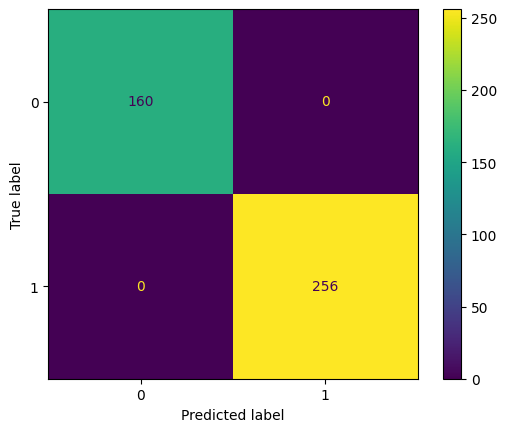

In [73]:
# Confusion Matrix Data Train - Display
ConfusionMatrixDisplay(cm_rf_train).plot()

**Insight** :

1. Hasil **predict** pada data **train** berhasil **100%** memprediksi **True Positif** dan **True Negatif**  
2. Hasil **predict** pada data **train** juga berhasil **100%** menghindari **False Negatif**, dimana **False Negatif** adalah target kita untuk di minimalisir.  
3. Hasil **predict** pada data **train** juga berhasil **100%** menghindari **False Positif**  
4. Sesuai dengan value pada **recall** bahwa model **Random Forest** sempurna dalam mendeteksi kelas **truuly positif** dan kelas **truuly negatif**

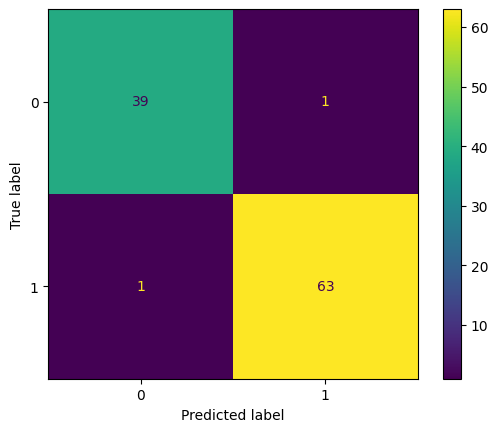

In [74]:
# Confusion Matrix Data Test - Display
ConfusionMatrixDisplay(cm_rf_test).plot()

**Insight** :    

1. Hasil **predict** pada data **test** berhasil **99%** memprediksi **True Positif** dan **True Negatif**  
2. Hasil **predict** pada data **test** juga sudah meminimalir **False Negatif** (**Tujuan Saya**), yang hanya berjumlah **1 data**  
3. Hasil **predict** pada data **test** juga berhasil meminimalisir **False Positif** yang hanya berjumlah **1 data**  
4. Sesuai dengan value di **classification matrix** bahwa data **test** juga mampu mendeteksi kelas **truuly positif** dan **truuly negatif** walaupun ada **1 data** di **false negatif** dan **false positif**.  

# **BAB 9 Hyperparameter Tuning**

Pada tahap ini, **tujuan utamanya adalah mengoptimalkan performa model** sekaligus **mengatasi masalah overfitting** yang dilihat dari sempurnanya nilai recall pada data train. **Hyperparameter tuning ini didasari oleh dokumentasi resmi Scikit-Learn.**

Penjelasan dan Pemilihan Hyperparameter  

- **n_estimators (Jumlah Pohon dalam Random Forest)**  
  Nilai default dari n_estimators adalah 100, tapi untuk stabilitas dan mendapatkan performa yang lebih baik, disarankan menggunakan nilai yang lebih besar seperti 200 atau 300. Penggunaan nilai yang besar ini membantu **mengurangi variansi karena prediksi**.

- **max_depth (Kedalaman pohon)**  
  Kedalaman pohon menentukan seberapa rumit aturan dibuat untuk memprediksi kelas positif/negatif. Kalau pohon terlalu dalam bisa jadi model akan lebih rumit dan malah terjadi **overfit (model terlalu cocok dengan data train)**, jadi saya batasi maksimal 10 agar model jadi lebih sederhana.

- **min_samples_split (Jumlah minimum data untuk membagi node pada pohon)**  
  Ini menentukan minimal berapa data harus ada agar pohon bisa dibagi lagi ke cabang baru. Jika jumlah data minimumnya terlalu kecil maka pohon jadi terlalu detail dan itu bisa menyebabkan **overfit**. Jadi saya membatasi min_samples_split di minimumnya 5.  

- **min_samples_leaf (Jumlah minimum data pada daun pohon)**  
  Sama fungsinya untuk menghindari daun yang hanya berisi sedikit sampel yang mungkin tidak representatif. Nilai 1-3 sangat umum digunakan untuk menjaga keseimbangan antara bias dan variance.

- **max_features (Jumlah fitur yang dipilih saat membagi node)**  
  Parameter ini menambah variasi antar pohon dengan membatasi fitur yang dipakai saat split. Pengaturan 'sqrt' atau 'log2' sering dipakai untuk classification agar **mengurangi korelasi antar pohon dan menghindari overfitting**.  

- **bootstrap (Pengambilan sampel data dengan pengembalian)**  
  Jika True, Random Forest menggunakan bootstrap sampling (sampling dengan pengembalian) untuk membentuk subset data tiap pohon. Ini penting untuk keunikan data training tiap pohon dan membantu kestabilan model.  

- **class_weight (Penyesuaian bobot kelas untuk data tidak seimbang)**  
  Parameter ini membantu model mengatasi ketidakseimbangan kelas dengan memberi bobot berbeda ke masing-masing kelas. Penggunaan balanced otomatis menyesuaikan bobot sesuai frekuensi kelas di data.

Referensi :  
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
- http://14.139.161.31/OddSem-0822-1122/Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition-Aurelien-Geron.pdf


In [91]:
#Menentukan parameternya
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20], 
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__min_samples_leaf': [2, 4, 6],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

In [92]:
# StratifiedKFold untuk menjaga distribusi kelas
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV untuk Random Forest
rf_gridcv = GridSearchCV(estimator=pipeline_rf,
                         param_grid=param_grid_rf,
                         cv=cv,
                         scoring='recall',
                         n_jobs=-1
                         )

# Training model
rf_gridcv.fit(X_train, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender']),
                                                                        ('yes_no',
                                                                         OrdinalEncoder(categories=[['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes...
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__class_weight': ['balanced',
                                                      'balanced_subsample'],
                         'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [2, 4, 6],
                         'classifier__min_samples_split': [5, 10, 15],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='recall')

In [93]:
# Hasil terbaik
rf_gridcv.best_params_

{'classifier__bootstrap': True,
 'classifier__class_weight': 'balanced',
 'classifier__max_depth': 10,
 'classifier__max_features': None,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [94]:
# Cek best scorenya
rf_gridcv.best_score_

0.956862745098039

In [95]:
#Mengambil model terbaik dan memasukkannya ke variable baru
rf_gridcv_best = rf_gridcv.best_estimator_

In [96]:
# Check performa model di train dan test set setelah di Hyperparameter Tuning
y_pred_rf_train_tuning = rf_gridcv_best.predict(X_train)
y_pred_rf_test_tuning = rf_gridcv_best.predict(X_test)

print("Classification Report After Tuning (Data Train) - Random Forest:")
print(classification_report(y_train_encoded, y_pred_rf_train_tuning))
print("-" * 70)
print("Classification Report After Tuning (Data Test) - Random Forest:")
print(classification_report(y_test_encoded, y_pred_rf_test_tuning))


Classification Report After Tuning (Data Train) - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       160
           1       0.99      0.98      0.99       256

    accuracy                           0.99       416
   macro avg       0.98      0.99      0.98       416
weighted avg       0.99      0.99      0.99       416

----------------------------------------------------------------------
Classification Report After Tuning (Data Test) - Random Forest:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



In [89]:
#Evaluasi model di data train sebelum di hyperparameter tuning
df_recall_train

,Recall 0,Recall 1
KNN,0.97500,0.949219
SVM,0.96875,0.996094
Decision Tree,1.00000,1.000000
Random Forest,1.00000,1.000000
XGBoost,1.00000,1.000000


In [ ]:
#Evaluasi model di data test sebelum di hyperparameter tuning
df_recall_test

,Recall 0,Recall 1
KNN,0.975,0.890625
SVM,0.975,0.984375
Decision Tree,1.000,0.968750
Random Forest,0.975,0.984375
XGBoost,1.000,0.968750


**Insight** :

Dari hasil Tuning saya mendapatkan perbedaan yaitu,

1. Setelah hyperparameter tuning, **recall untuk kelas positif (1) di data train turun dari 1 menjadi 0.98**, dan **kelas negatif (0) turun dari 0.96 menjadi 0.95**.  
2. Penurunan recall ini menunjukkan model menjadi **lebih general dan tidak lagi menghafal data training secara berlebihan (overfitting)**.  
3. Fokus utama dari model ini adalah **meminimalisir false negatives**, karena false negatives berarti pasien yang sebenarnya positif diabetes tidak terdeteksi, sehingga **risiko komplikasi serius meningkat akibat tidak adanya penanganan dini**.  
4. Dengan ini diharapkan model yang sudah di tuning **handal dalam konteks mendeteksi diabetes dini**, dimana ini berorientasi dalam **pencegahan risiko yang lebih parah ke depannya**.

Confusion Matrix : 


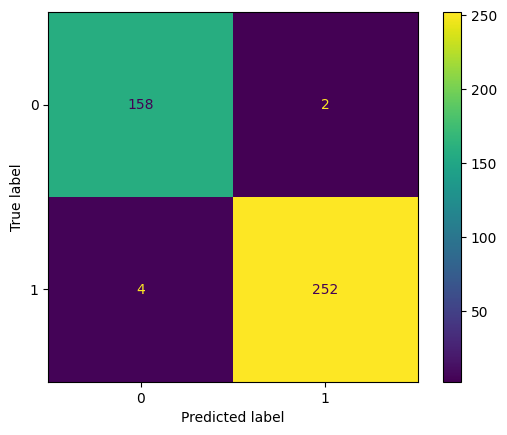

In [98]:
#Visualisasi Confusion Matrix data train
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_train, y_train_encoded))

**Insight** :

1. False Negative menjadi **4**, yang sebelumnya 0 sebelum dilakukan tuning. Memang performa sedikit menurun, tapi ini sesuai tujuan bahwa model yang **terlalu sempurna cenderung overfitting** dan kurang generalisasi.  
2. False Positive sedikit bertambah menjadi **2** (dari sebelumnya 0). Hal ini tidak terlalu berbahaya karena pasien yang dideteksi positif walaupun sebenarnya negatif akan lebih waspada dan bisa melakukan pemeriksaan lebih lanjut tanpa risiko klinis serius.  
3. True Positive (TP) dan True Negative (TN) masih **sangat baik**, terlihat dari jumlah yang besar pada diagonal utama confusion matrix (252 TP dan 158 TN), menunjukkan model tetap andal dalam mendeteksi kasus positif dan negatif secara tepat.


Confusion Matrix : 


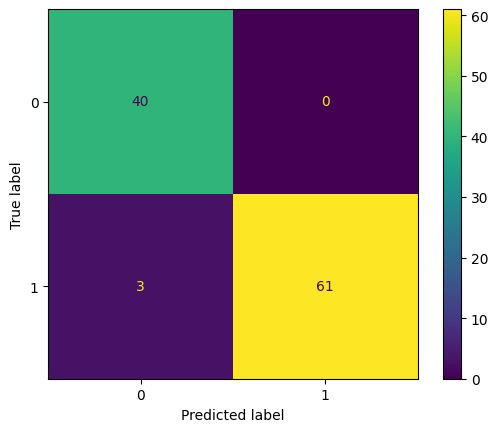

In [99]:
#Visualisasi Confusion Matrix data test
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test, y_test_encoded))

**Insight** :  

1. **Penurunan pada recall 1 di data test dari sebelumnya 1 menjadi 3 (False Negative naik menjadi 3)**, terbukti bahwa performa model diturunkan supaya **tidak overfit**.  
2. **Hasil recall 0 tidak berubah**, tapi memang tidak sepenting recall 1 dalam konteks bisnis.  
3. Untuk **True Positive (TP) dan True Negative (TN) juga sudah bagus**, jika kita lihat dari nilai False Negative (FN) dan False Positive (FP).

Cross Val before tuning

In [97]:
#cek cross val lagi before tuning
scoresModel_RF= cross_val_score(pipeline_rf, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Random Forest Before Tuning:", scoresModel_RF)
print("Rata-rata Recall Random Forest Before Tuning:", scoresModel_RF.mean())
print("Standar Deviasi Recall Random Forest Before Tuning:", scoresModel_RF.std())

Cross Validation Recall Scores Random Forest Before Tuning: [1.         0.92941176 0.96470588]
Rata-rata Recall Random Forest Before Tuning: 0.9647058823529412
Standar Deviasi Recall Random Forest Before Tuning: 0.02881752638568444


Cross Val after tuning

In [ ]:
#cek cross val lagi after tuning
scoresModel_RF= cross_val_score(rf_gridcv_best, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Recall Scores Random Forest After Tuning:", scoresModel_RF)
print("Rata-rata Recall Random Forest After Tuning:", scoresModel_RF.mean())
print("Standar Deviasi Recall Random Forest After Tuning:", scoresModel_RF.std())

Cross Validation Recall Scores Random Forest After Tuning: [1.         0.91764706 0.95294118]
Rata-rata Recall Random Forest After Tuning: 0.956862745098039
Standar Deviasi Recall Random Forest After Tuning: 0.033734608890363255


**Insight**:

1. Dari hasil **cross-validation recall**, sebelum tuning Random Forest mendapatkan nilai recall rata-rata sekitar **0.965** dengan standar deviasi sekitar **0.029**, sedangkan setelah tuning rata-rata recall sedikit menurun menjadi sekitar **0.957** dengan standar deviasi naik menjadi sekitar **0.034**.  
2. Perubahan ini menunjukkan bahwa performa recall model pasca tuning **relatif stabil** dan tidak jauh berbeda dengan sebelum tuning, walaupun standar deviasi sedikit naik, kondisi ini masih dapat diterima dalam konteks bisnis untuk **meminimalisir false negative**.  
3. Model tuning **tidak menurunkan performa secara signifikan**, tetapi menjaga keseimbangan antara stabilitas model dan kemampuan mendeteksi kasus positif (recall pada kelas 1) yang tinggi.  
4. Hal ini penting terutama dalam konteks medis, di mana **meminimalisir false negative sangat krusial** untuk deteksi dini penyakit seperti diabetes.  
5. Secara keseluruhan, tuning pada Random Forest memberikan hasil yang seimbang tanpa overfitting, dengan recall yang tetap tinggi dan cukup konsisten pada cross-validation, mendukung tujuan bisnis untuk **mengurangi risiko missed detection (false negative)**.

# **BAB 10 Model Saving**

In [101]:
#save model random forest after tuning dengan pickle
with open('model_Diabetes_Early_Detection.pkl', 'wb' ) as file:
    pickle.dump(rf_gridcv_best, file)

# **BAB 11 Model Inference**

Inference dilakukan di file Diabetes_ED_Inference.ipynb

# **BAB 12 Conclusion**


**Keterkaitan EDA dan Model**

Berdasarkan keseluruhan proses eksplorasi data (EDA) dan evaluasi model machine learning, ditemukan benang merah yang menjelaskan bagaimana **pola dalam data secara langsung memengaruhi cara kerja dan hasil prediksi model**:

1. **Gejala dominan seperti polyuria dan polydipsia** ditemukan pada mayoritas pasien dengan status positif diabetes. Dari total 320 pasien positif, **lebih dari 60% mengalami kedua gejala ini secara bersamaan**, dan sebagian besar sisanya memiliki setidaknya salah satu dari keduanya.

2. **Model machine learning belajar dari pola ini**, sehingga saat mendeteksi keberadaan salah satu dari *polyuria* atau *polydipsia*, **model sangat cenderung memprediksi "Positive"**, bahkan jika gejala lainnya bernilai "No". Ini membuat model memiliki **recall yang tinggi** (jarang melewatkan kasus positif), tetapi berisiko meningkatkan **false positive** pada pasien yang sebenarnya negatif.

3. Ditemukan pula adanya **kasus asimptomatik** (tanpa gejala) yang terdeteksi positif, meskipun sangat sedikit jumlahnya. Ini menunjukkan pentingnya mempertimbangkan gejala ringan atau faktor risiko lain yang belum tercakup.

4. **Beberapa fitur seperti obesitas dan delayed healing** tidak terbukti signifikan terhadap status diabetes pada tahap awal. Namun, fitur-fitur tersebut tetap dipertahankan karena secara klinis tetap relevan dan dapat memperkaya konteks deteksi pada kasus-kasus tertentu.

5. Hasil evaluasi menunjukkan bahwa model memiliki **bias terhadap pasien perempuan usia 33 tahun ke atas**, terutama dalam mendeteksi kelas negatif. Hal ini juga sejalan dengan hasil testing model yang menunjukkan bahwa pada kelompok ini, model kesulitan membaca pola negatif meskipun semua gejala bernilai "No". Ini kemungkinan besar terjadi karena **data yang kurang banyak** dari kelompok tersebut di dalam dataset.

---

**Rekomendasi untuk Pengembangan Model**

- **Perbaiki distribusi data** dengan menambah jumlah data perempuan usia >33 tahun, khususnya yang berstatus negatif, untuk mengurangi bias model.
- Lakukan **feature engineering lanjutan** dengan menambahkan fitur-fitur baru seperti riwayat keluarga, pola makan, dan aktivitas fisik agar model lebih kontekstual.
- Pertimbangkan **threshold tuning** atau metode kalibrasi untuk menghindari prediksi "positif otomatis" hanya karena ada satu gejala kuat.
- Evaluasi model menggunakan **fairness metrics dan stratifikasi performa per gender dan usia** agar ketimpangan model lebih terukur dan bisa diperbaiki secara sistematis.
